<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Practical Assignment 5 - Machine Learning <br>
<font color=696880 size=4>
    Ali Sharifi


____

# Personal Data

In [1]:
# Set your student number
student_number = '400105144'
Name = 'Amirhossein'
Last_Name = 'Alamdar'

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(42)

# Question 1: Polynomial Regresrion Implementation (15 points)

<font size=4>
Author: Ali Sharifi
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

In the following section, you will implement a class that performs Polynomial Regression. Follow instructions in the methods' body. Note that your input and output shapes must be the same as instructions.
$$\hat{y} = a_nx^n + \dots + a_1x + a_0$$

In [3]:
class PolynomialRegression:
    """
        The class of polynomial regression.
    """
    def __init__(self, degree):
        """
          initialize parameters you need.
        """
        # Write your code here
        self.degree = degree
        self.weights = np.zeros(degree+1)
    
    def PolynomialFeature(self, X, degree):
        """
          X of the shape (m, 1)
          returns an array A=(a_{ij}) of the shape (m, degree) such that a_{ij} = X_i^j
        """
        # Write your code here
        m = X.shape[0]
        A = np.zeros((m, degree+1))
        for i in range(degree+1):
            A[:, i] = np.power(X[:], i).squeeze().T
        return A
    
    def LinearRegression(self, X, Y):
        """
          X of the shape (m, n)
          y of the shape (m,)
          returns coefficients of linear regression of the shape (n+1,) (extra coefficient for bias term)
        """
        # Write your code here
        return np.linalg.inv(X.T @ X) @ X.T @ Y
    
    def fit(self, X, Y):
        """
            X of the shape (m, n)
            y of the shape (m,)
            returns None
        """
        # Write your code here
        X_poly = self.PolynomialFeature(X, self.degree)
        self.weights = self.LinearRegression(X_poly, Y)

    def predict(self, X):
        """
            X of the shape (m, 1)
            returns an array of the shape (m,)
        """
        # Write your code here
        X_poly = self.PolynomialFeature(X, self.degree)
        return X_poly @ self.weights


# Question 2: Regressing a Sine Function in Polyomial Functions (10 points)

Consider the underlying function $f^*(X) = \sin(X)$. Generate 15 datasets with 5, 10, 15, 25, and 50 i.i.d samples from the following distribution: (three datasets with each size)
$$
X \sim \text{uniform}(0, 2\pi) \\
Y | X \sim \text{N}(f^*(X), \sigma^2) \\
\text{where } \sigma = .5
$$
Assume we want to train models of degrees 1, 3, 8, 12, and 15 on these datasets. Generate a $5\times 5$ grid of plots. Assume that rows correspond to the dataset size and columns correspond to the degree of model. In each plot, plot the result hypothesis functions from training the corresponding model on the corresponding datasets. In addition plot the underlying function.

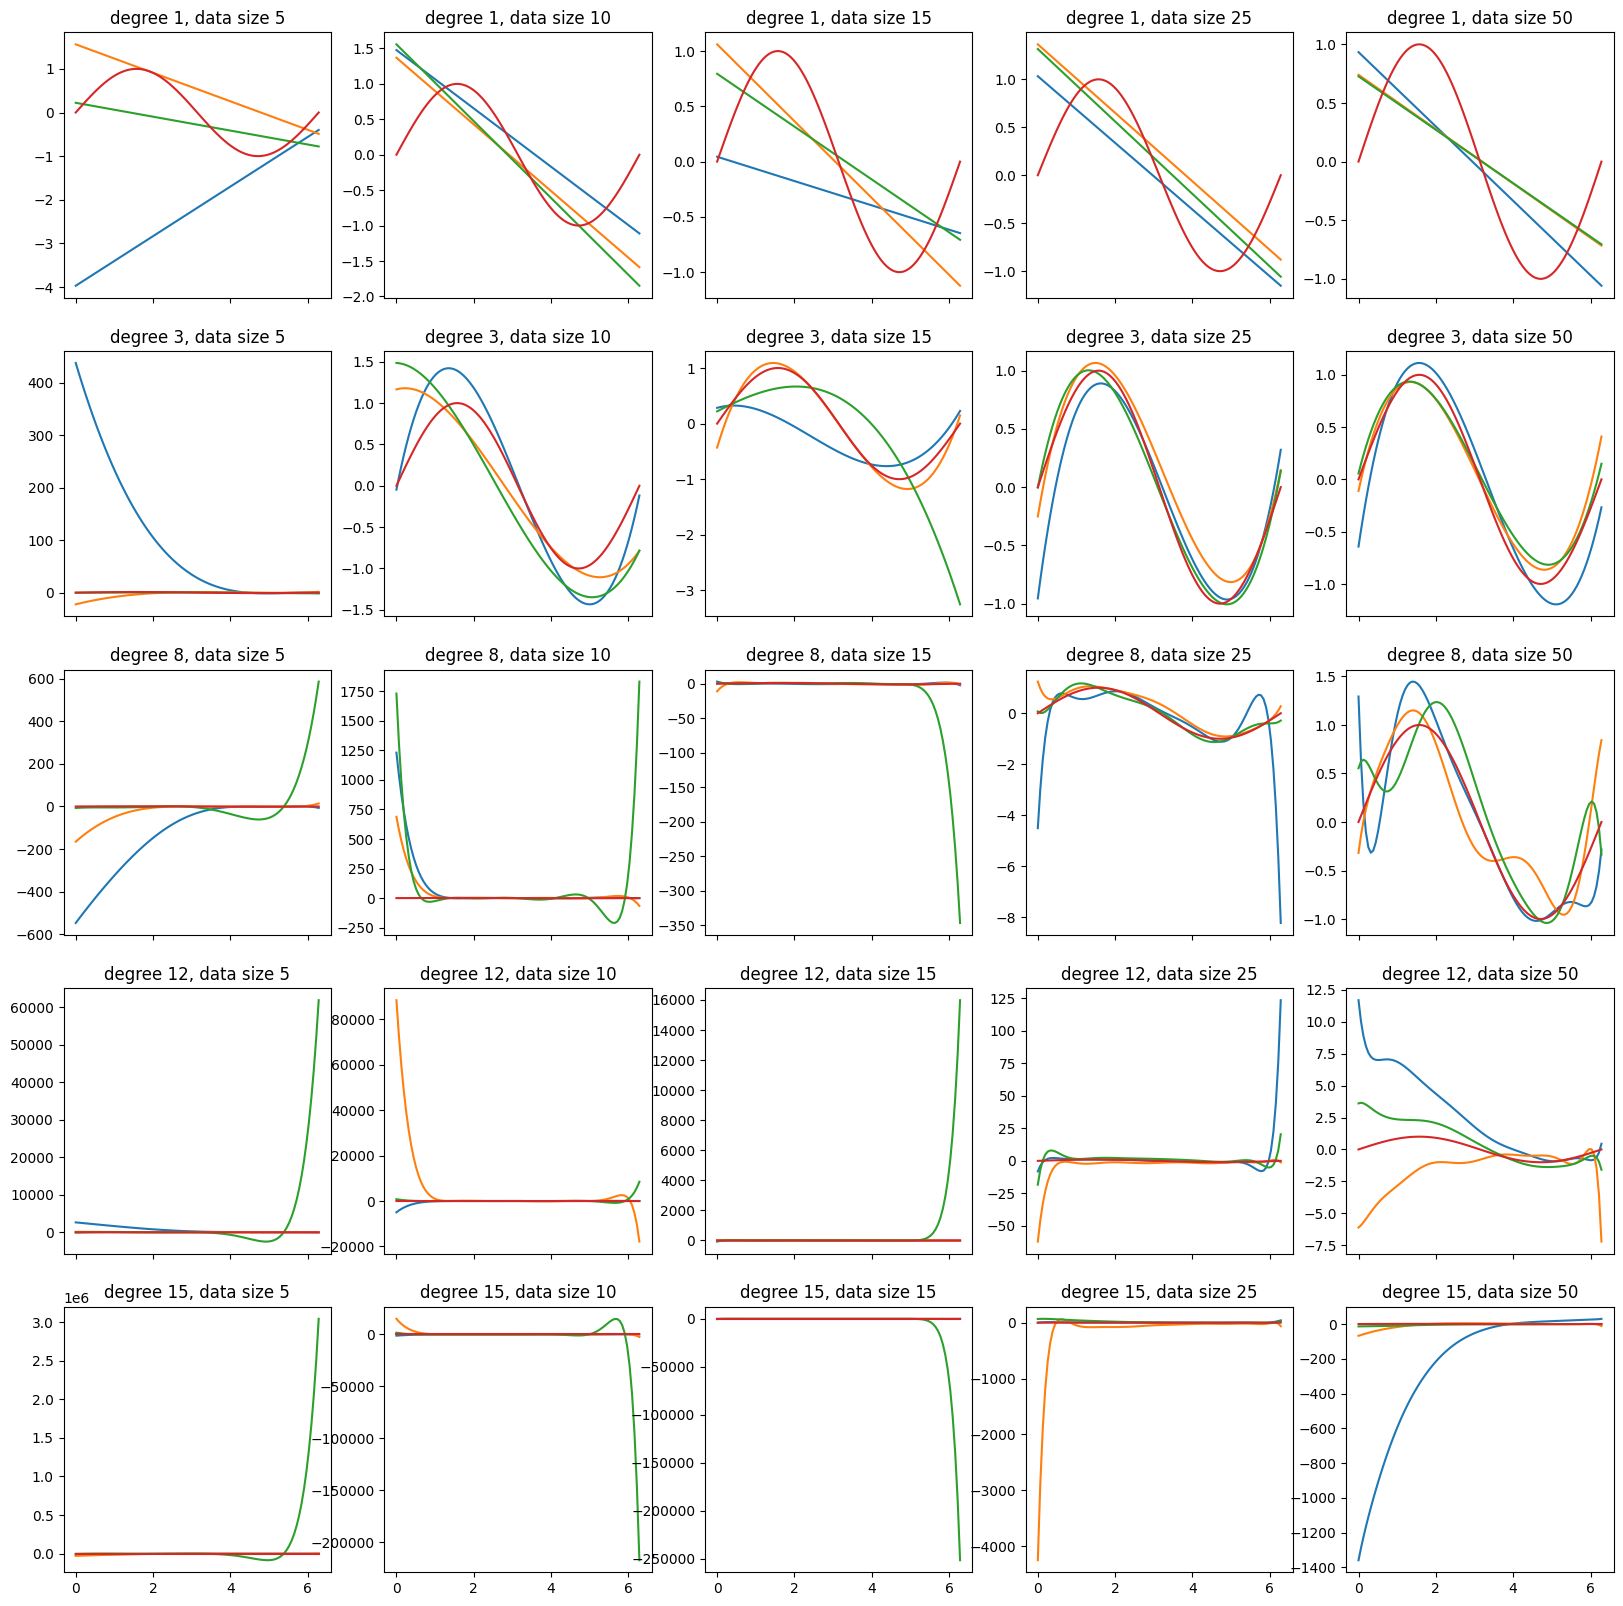

In [4]:
fig, ax = plt.subplots(5, 5, sharex=True, gridspec_kw=dict(hspace=.2, wspace=.2), figsize=(20, 20))
datasets = []
sizes = [5, 10, 15, 25, 50]
degrees = [1, 3, 8, 12, 15]

def PolynomialFeature(X, degree):
        m = X.shape[0]
        A = np.zeros((m, degree+1))
        for i in range(degree+1):
            A[:, i] = np.power(X[:], i).squeeze().T
        return A
def gen(num_samples):
    X = np.random.uniform(low = 0, high = 2*np.pi, size = num_samples)
    # for i in range(Po):
    # while np.isclose(np.linalg.det(X.T @ X), 0):
    #     X = np.random.uniform(low = 0, high = 2*np.pi, size = num_samples)
    X = np.sort(X)
    Y = np.sin(X) + np.random.normal(0, 0.5, num_samples)
    return [X, Y]
for s in sizes:
    d = []
    for i in range(3):
        d.append(gen(s))
    datasets.append(d)

X_sin = np.linspace(0, 2 * np.pi, 100)
y_sin = np.sin(X_sin)
for size in range(5):
    for degree in range(5):
        for data in range(3):
            X, Y = datasets[size][data]
            pr = PolynomialRegression(degrees[degree])
            pr.fit(X, Y)
            pred = pr.predict(X_sin)
            ax[degree, size].plot(X_sin, pred)
        ax[degree, size].plot(X_sin, y_sin)
        ax[degree, size].set_title(f'degree {degrees[degree]}, data size {sizes[size]}')
        # ax[size, degree].legend()
plt.show()

Which models are more sensitive to the "noise"? (i.e. If you sample many datasets with the same size and from the same distributions, the trained models on these datasets are very different.) How does the performance of each model change as the number of training samples increase? Does the performace of the linear model improve as the number of samples increase? How about the model of degree 15?

# Question 3: Estimating Bias-Variance Trade-off and Drawing Heatmaps (25 points)

## Estmate Bias-Variance Trade-off (20 points)

In this section, you will approximate bias and variance in different classes of polynomial regression models and then find relations between these quantities and n_train_samples and degree.

In [27]:
def bias_variance_estimation(degree, n_train_samples, n_trials=100):
    """
    This function estimates bias and variance of the hypothesis space of polynomials of degree at most d.
    You must perform n_trials, each consists of generating a training set of n_train_samples samples.
    Then you can compute the mean hypothesis and compute bias and variance.
    """
    # generate n_trials datasets each with n_train_samples
    datasets = []
    
    # X_sin, _ = gen(n_train_samples)
    # y_sin = np.sin(X_sin)
    X_sin = np.linspace(0, 2 * np.pi, 100)
    y_sin = np.sin(X_sin)
    
    # Write your code here
    # pred = np.zero((n_trials, n_train_samples))
    bias = 0
    variance = 0
    totb = 0
    totv = 0
    for _ in range(n_trials):   
        X, y = gen(n_train_samples)     
        datasets.append([X, y])
        pr = PolynomialRegression(degree)
        pr.fit(X, y)
        pred = pr.predict(X_sin)

        totb += np.abs(np.mean(pred - y_sin))
        totv += np.mean((pred - y_sin)**2)
        

    #estimate bias and variance
    # Write your code here
    totv /= n_trials
    totb /= n_trials
    return totb, totv

## Drawing Heatmaps (5 points)

Now, estimate bias and variance for a model of degree $d$ trained on $n$ samples for values of $d$ and $n$ in the previous section. Then show the results for bias and variance separately as heat maps. (If values of bias and variance are very large, you can use a logarithmic scale.)

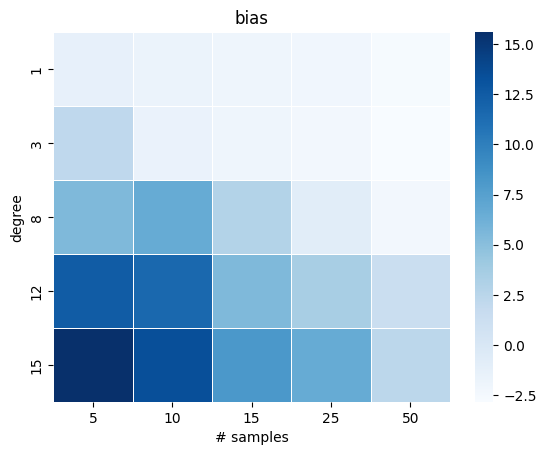

In [47]:
# Plot bias heatmap
# Write your code here
# print(bias_variance_estimation(15, 5))

bias = np.zeros((len(degrees), len(sizes)))
var = np.zeros((len(degrees), len(sizes)))
for d in range(len(degrees)):
    for s in range(len(sizes)):
        while True:
            try:
                bias[d, s], var[d, s] = np.log(bias_variance_estimation(degrees[d], sizes[s]))
                break
            except:
                continue
            

sns.heatmap(bias, cmap='Blues', fmt='.2f', linewidths=.5,
            xticklabels=sizes, yticklabels=degrees)

plt.xlabel('# samples')
plt.ylabel('degree')
plt.title('bias')

plt.show()

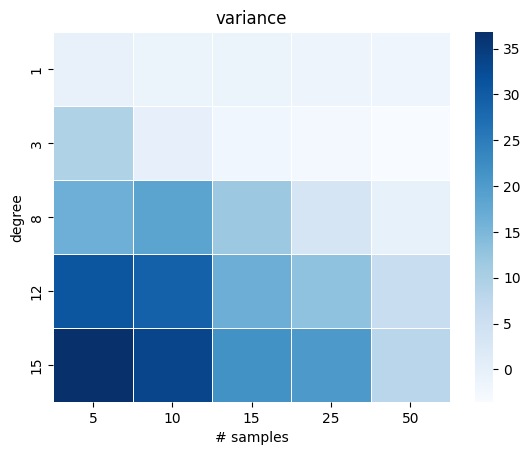

In [48]:
# Plot variance heatmap
# Write your code here
sns.heatmap(var, cmap='Blues', fmt='.2f', linewidths=.5,
            xticklabels=sizes, yticklabels=degrees)

plt.xlabel('# samples')
plt.ylabel('degree')
plt.title('variance')

plt.show()

Fixing the `degree`, how does bias (or variance) change as the `n_train_samples` increase? Similarly, fixing the `n_train_samples`, how does bias (or variance) change as the `degree` increase? Assume that you have a large dataset. Do you prefer to use a "complex" model or a "simple" model? Why?

As we can see, in equal degrees bias and variance decrease as the number of samples increases(estimate gets more accurate). And in a fixed number of samples, bias and variance increase as the degree increases. that's because there aren't enough samples for our model's complexity.

If I have a large dataset, I would increase the model complexity till it doesn't have too much parameters compared to sample_numbers.